## 1 Configuración del Entorno

In [115]:
# Librerias para el tratamiento y visualización de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Librerias para el Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## 2. Resumen de los Datos

### 2.1. Carga de los Datos

In [117]:
data = pd.read_csv("CreditRisk.csv")
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### 2.2. Carga de Diccionario de Información de Columnas

In [4]:
#Se carga el diccionario con los detalles de las columnas.

file_path = "Diccionario.md"

with open(file_path, "r", encoding="utf-8") as file:
    contenido = file.read()

print(contenido)

# Descripción de Variables del Dataset de Credit Scoring

- **status**: Estado del crédito, indicando la situación actual del mismo.
- **seniority**: Años de experiencia laboral del solicitante.
- **home**: Tipo de vivienda del solicitante.
- **time**: Plazo del préstamo en meses.
- **age**: Edad del solicitante.
- **marital**: Estado civil del solicitante.
- **records**: Historial de créditos previos del solicitante.
- **job**: Tipo de trabajo o categoría ocupacional.
- **expenses**: Gastos mensuales reportados.
- **income**: Ingresos mensuales del solicitante.
- **assets**: Valor de los ahorros o activos.
- **debt**: Obligaciones financieras actuales.
- **amount**: Monto solicitado en el préstamo.
- **price**: Prima o valor total a devolver por el crédito.




### 2.3. Vista General de los Datos

In [5]:
#ver la información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [6]:
#ver las principales informaciones estadísticas
data.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


A primera vista se observa una incongruencia en los valores máximos de las columnas: *income*, *assets* y *debt*

In [7]:
# Vista de cantidad de valores únicos en cada columna
data.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        353
assets        160
debt          183
amount        285
price        1419
dtype: int64

In [8]:
# Vista de valores únicos en las columnas con menos de 10 de valores
columnas = data.columns
print("ANÁLISIS DE VALORES ÚNICOS EN COLUMNAS CATEGÓRICAS\n" + "="*50)

for columna in columnas:
    n_valores = data[columna].nunique()
    
    if n_valores < 10:
        # Para columnas con pocos valores únicos, mostrar detalle completo
        valores_unicos = data[columna].unique()
        conteo = data[columna].value_counts()
        
        print(f"\n## Columna '{columna}': {n_valores} valores únicos")
        print("-" * 40)
        
        # Mostrar cada valor único con su conteo y porcentaje
        for valor, cantidad in conteo.items():
            porcentaje = (cantidad / len(data)) * 100
            print(f"   {valor}: {cantidad} registros ({porcentaje:.2f}%)")
    else:
        # Para columnas con muchos valores únicos, mostrar solo un resumen
        print(f"\n## Columna '{columna}': {n_valores} valores únicos")
        print("-" * 40)
        print(f"   Top 5 valores más frecuentes:")
        
        # Mostrar los 5 valores más comunes
        top_values = data[columna].value_counts().head(5)
        for valor, cantidad in top_values.items():
            porcentaje = (cantidad / len(data)) * 100
            print(f"   {valor}: {cantidad} registros ({porcentaje:.2f}%)")
        
        # Información sobre el rango para variables numéricas
        if data[columna].dtype in ['int64', 'float64']:
            print(f"   Rango: {data[columna].min()} - {data[columna].max()}")
    
    print() 

ANÁLISIS DE VALORES ÚNICOS EN COLUMNAS CATEGÓRICAS

## Columna 'status': 3 valores únicos
----------------------------------------
   ok: 3200 registros (71.83%)
   default: 1254 registros (28.15%)
   unk: 1 registros (0.02%)


## Columna 'seniority': 47 valores únicos
----------------------------------------
   Top 5 valores más frecuentes:
   0: 535 registros (12.01%)
   1: 510 registros (11.45%)
   2: 454 registros (10.19%)
   3: 336 registros (7.54%)
   5: 266 registros (5.97%)
   Rango: 0 - 48


## Columna 'home': 7 valores únicos
----------------------------------------
   owner: 2107 registros (47.30%)
   rent: 973 registros (21.84%)
   parents: 783 registros (17.58%)
   other: 319 registros (7.16%)
   private: 247 registros (5.54%)
   ignore: 20 registros (0.45%)
   unk: 6 registros (0.13%)


## Columna 'time': 11 valores únicos
----------------------------------------
   Top 5 valores más frecuentes:
   60: 1933 registros (43.39%)
   36: 942 registros (21.14%)
   48: 860 regis

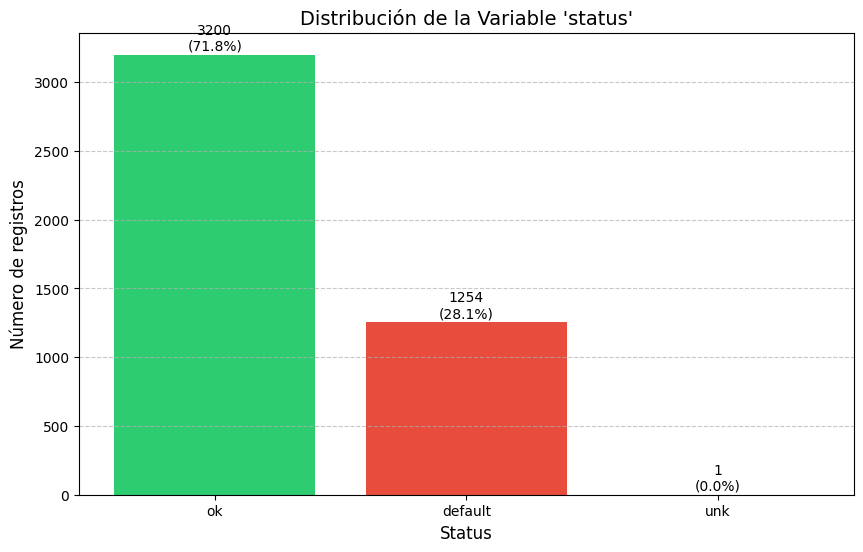

In [9]:
# Se analiza gráficamente la distribución de los valores en la variable objetivo
status_counts = data["status"].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['#2ECC71', '#E74C3C', '#95A5A6'])

# Añadir etiquetas con valores y porcentajes
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / status_counts.sum()) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height}\n({percentage:.1f}%)',
             ha='center', va='bottom')

plt.title("Distribución de la Variable 'status'", fontsize=14)
plt.ylabel("Número de registros", fontsize=12)
plt.xlabel("Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
def tratar_outliers(codigo_especial=99999999, percentil_winsor=99, visualizar=False):
    """
    Versión optimizada para tratamiento de valores atípicos sin warnings.
    Combina identificación y tratamiento en una sola función eficiente.
    
    Parámetros:
    -----------
    codigo_especial : int
        Valor considerado como código especial (por defecto: 99999999)
    percentil_winsor : int
        Percentil para winsorización (por defecto: 99)
    visualizar : bool
        Si es True, genera visualizaciones básicas (por defecto: False)
    
    Retorna:
    --------
    data_limpio : DataFrame
        DataFrame limpio sin outliers
    """
    global data
    
    # Copiar dataset para no modificar el original
    data_limpio = data.copy()
    
    # Definir columnas a procesar
    cols_categoricas = ['status', 'home', 'marital', 'records', 'job']
    cols_financieras = ['income', 'assets', 'debt']
    
    # 1. Eliminar registros problemáticos (más rápido con vectorización)
    # Identificar registros con 'unk' en status
    mask_status_unk = data_limpio['status'] == 'unk'
    
    # Identificar registros con valores especiales y 'unk' simultáneamente
    mask_valores_especiales = (data_limpio[cols_financieras] == codigo_especial).any(axis=1)
    mask_valores_unk = data_limpio[cols_categoricas].isin(['unk']).any(axis=1)
    mask_problematicos = mask_valores_especiales & mask_valores_unk
    
    # Máscara combinada para registros a eliminar
    mask_eliminar = mask_status_unk | mask_problematicos
    
    # Contar registros a eliminar
    num_eliminados = mask_eliminar.sum()
    
    # Eliminar registros problemáticos
    if num_eliminados > 0:
        data_limpio = data_limpio[~mask_eliminar]
    
    # 2. Aplicar winsorización a valores extremos (evitando warnings)
    for col in cols_financieras:
        # Calcular límite para winsorización
        limite_superior = np.percentile(data_limpio[col], percentil_winsor)
        
        # Aplicar winsorización utilizando numpy.where en lugar de clip
        # Esto evita el warning de downcasting
        data_limpio[col] = np.where(
            data_limpio[col] > limite_superior,
            limite_superior,
            data_limpio[col]
        )
    
    # 3. Generar visualización básica si se solicita
    if visualizar:
        # Crear figura para visualización
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Visualizar distribución de las tres columnas financieras después de tratamiento
        for i, col in enumerate(cols_financieras):
            sns.boxplot(x=data_limpio[col], ax=axes[i])
            axes[i].set_title(f'Distribución de {col} (tratado)')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar estadísticas básicas
        print("Estadísticas descriptivas después del tratamiento:")
        print(data_limpio[cols_financieras].describe())
    
    # 4. Mostrar resumen del proceso
    print(f"Proceso completado: {num_eliminados} registros eliminados ({num_eliminados/len(data)*100:.2f}%)")
    print(f"Registros originales: {len(data)}, Registros finales: {len(data_limpio)}")
    
    return data_limpio

# Función para actualizar el dataset global (uso opcional)
def actualizar_dataset(df_limpio):
    """
    Actualiza la variable global 'data' con el dataset limpio.
    
    Parámetros:
    -----------
    df_limpio : DataFrame
        DataFrame limpio que reemplazará a 'data'
    """
    global data
    data = df_limpio.copy()
    print(f"Dataset global actualizado. Nuevas dimensiones: {data.shape}")

# Función simplificada para solo eliminar registros con 'unk'
def eliminar_registros_unk():
    """
    Función ultra rápida que solo elimina registros con valores 'unk'.
    Útil cuando solo se necesita este tipo de limpieza.
    
    Retorna:
    --------
    data_limpio : DataFrame
        DataFrame sin registros que contienen 'unk'
    """
    global data
    
    cols_categoricas = ['status', 'home', 'marital', 'records', 'job']
    
    # Identificar registros con 'unk' en cualquier columna categórica
    mask_unk = data[cols_categoricas].isin(['unk']).any(axis=1)
    
    # Eliminar estos registros
    data_limpio = data[~mask_unk].copy()
    
    print(f"Se eliminaron {mask_unk.sum()} registros con valores 'unk'")
    print(f"Registros restantes: {len(data_limpio)}")
    
    return data_limpio

Proceso completado: 7 registros eliminados (0.16%)
Registros originales: 4455, Registros finales: 4448


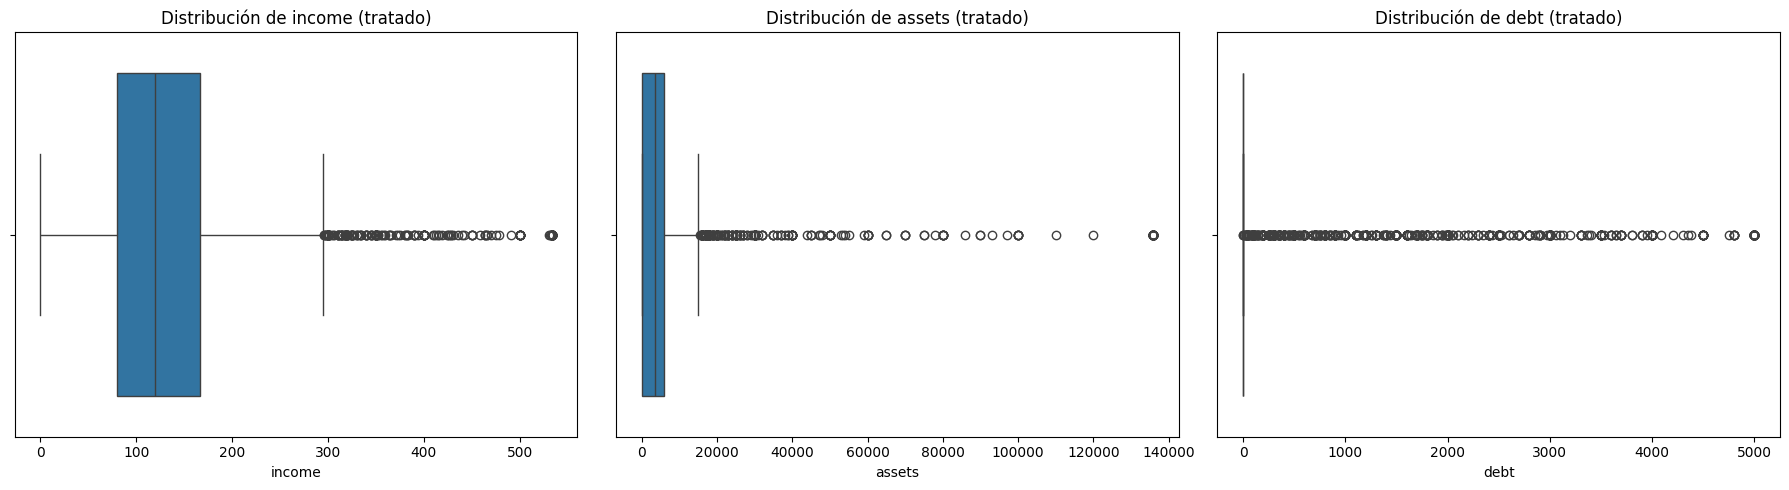

Estadísticas descriptivas después del tratamiento:
            income         assets         debt
count  4448.000000    4448.000000  4448.000000
mean    132.786994    6526.716951   320.090603
std      88.896571   16050.132765   919.188259
min       0.000000       0.000000     0.000000
25%      80.000000       0.000000     0.000000
50%     120.000000    3500.000000     0.000000
75%     166.000000    6000.000000     0.000000
max     533.590000  135900.000000  5000.000000
Proceso completado: 7 registros eliminados (0.16%)
Registros originales: 4455, Registros finales: 4448


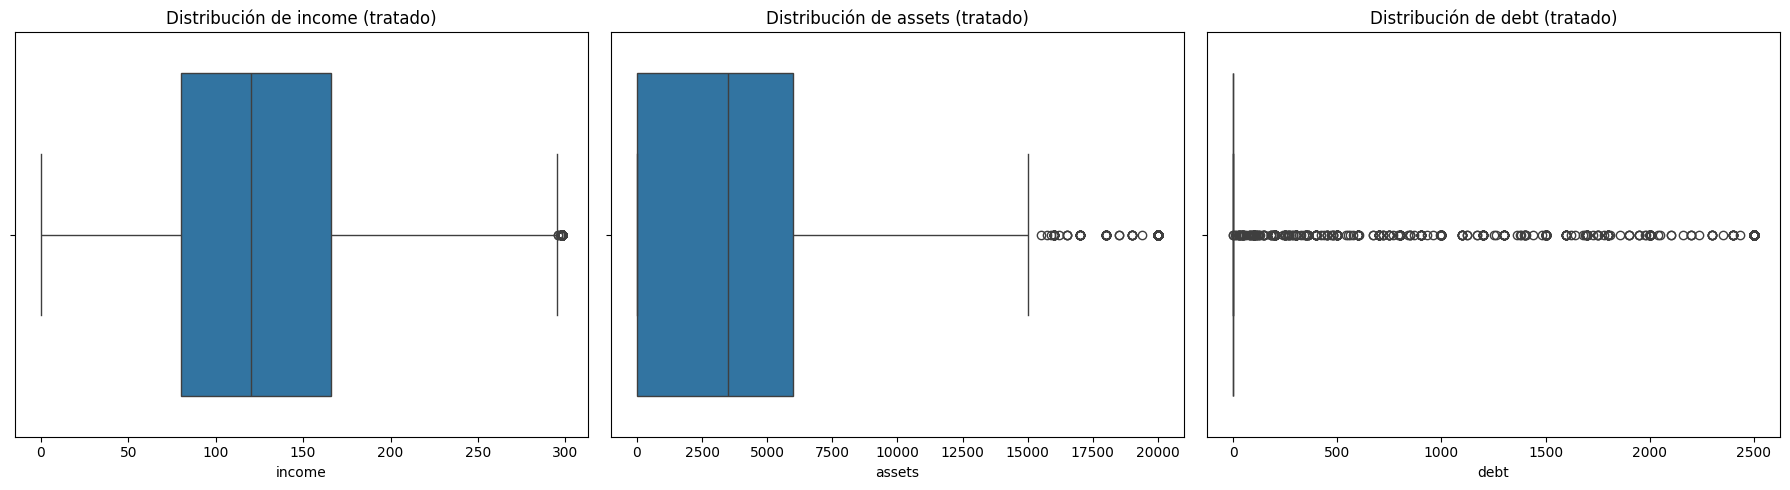

Estadísticas descriptivas después del tratamiento:
            income        assets         debt
count  4448.000000   4448.000000  4448.000000
mean    127.733138   4571.276304   257.074415
std      72.828029   5486.995386   669.549747
min       0.000000      0.000000     0.000000
25%      80.000000      0.000000     0.000000
50%     120.000000   3500.000000     0.000000
75%     166.000000   6000.000000     0.000000
max     298.000000  20000.000000  2500.000000
Proceso completado: 7 registros eliminados (0.16%)
Registros originales: 4455, Registros finales: 4448
Dataset global actualizado. Nuevas dimensiones: (4448, 14)


In [13]:
data_limpio = tratar_outliers()

# Con visualización
data_limpio = tratar_outliers(visualizar=True)

# Con parámetros personalizados
data_limpio = tratar_outliers(
    codigo_especial=99999999,
    percentil_winsor=95,
    visualizar=True
)

# Actualizar el dataset global con los resultados (opcional)
actualizar_dataset(data_limpio)

### Se observa que varias columnas tienen en sus registros la palabra '**unk**' como valor, que básicamente representa que se desconoce  dicho valor

## 3. Pre-procesamiento de los Datos

### 3.1. Establecimiento de la variable objetivo

Para el modelo, se va a establecer el análisis segun el argumento ***default*** (que está implícito en la columna ***status***) el cual indicará:
* 1: Cuando la persona **no** ha pagado la totalidad de su deuda
* 2: Cuando la persona **sí** ha pagado la totalidad de su deuda

In [14]:
data_pro= data_limpio.copy () 
data_pro['status'] = data_pro['status'].replace('unk', 'ok')
data_pro.head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468


In [15]:
#Verificamos las columnas 
data_pro.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [16]:
#Procesamos los campos de status  los convertitmos a 0 y 1, obtenemos los primeros 10 registros.
data_pro = pd.get_dummies(data=data_pro, columns=['status'], dtype= int)
data_pro.head(10)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,status_default,status_ok
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0,1
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0,1
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,1,0
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0,1
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0,1
5,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645,0,1
6,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800,0,1
7,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093,0,1
8,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957,0,1
9,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468,1,0


In [17]:
# Se elimina la columna innecesaria
data_pro.drop('status_ok', axis=1, inplace=True)
# Se renombra la variable objetivo
data_pro.rename(columns={'status_default': 'default_final'}, inplace=True)
data_pro.head(10)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default_final
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0
5,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645,0
6,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800,0
7,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093,0
8,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957,0
9,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468,1


### 3.2. Tratamiento de Variables Categóricas

#### 3.2.1. Análisis variables categóricas

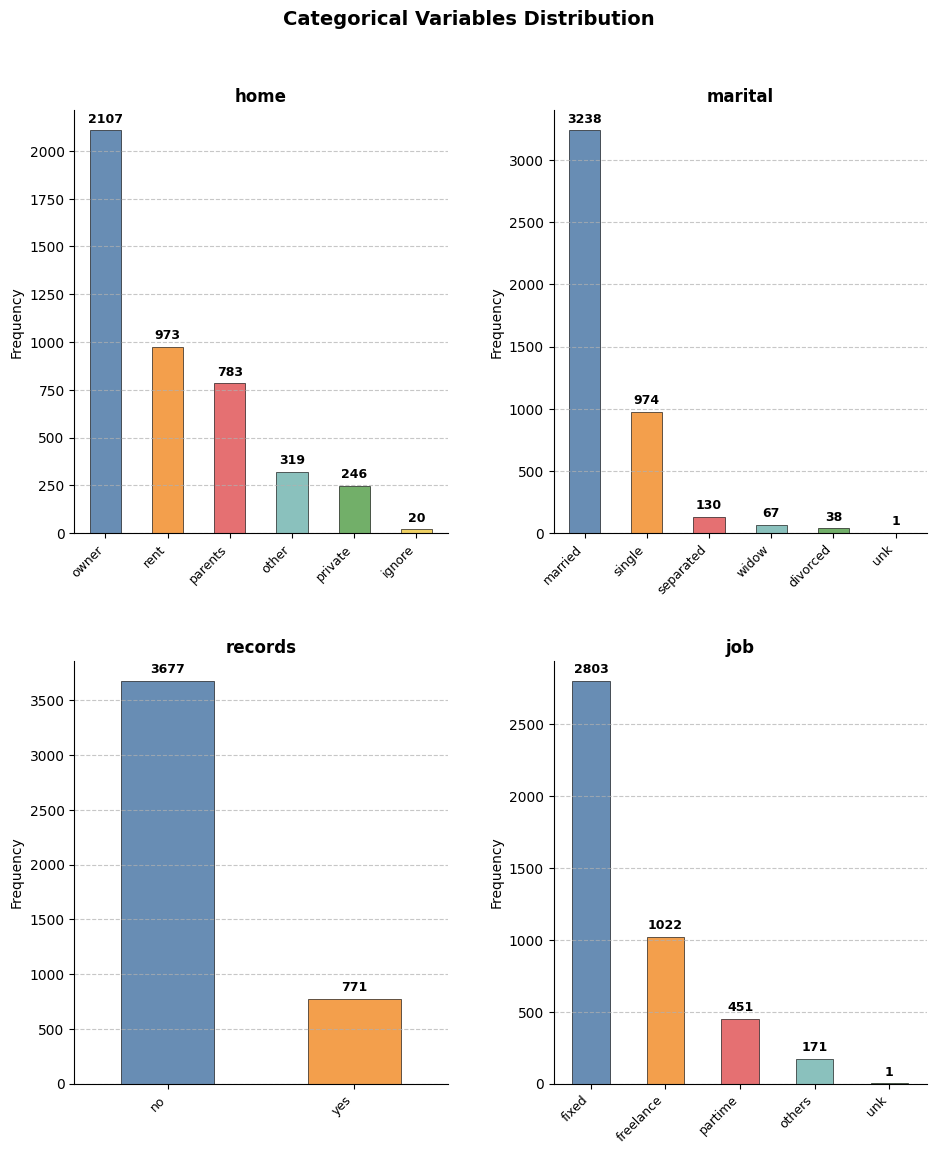

         home  marital records    job
count    4448     4448    4448   4448
unique      6        6       2      5
top     owner  married      no  fixed
freq     2107     3238    3677   2803


In [18]:
def visualize_categorical_vars(data_pro, rows=2, cols=2, figsize=(10, 12)):
    """
    Analyzes and visualizes categorical variables in a DataFrame using stylized bar charts.
    
    Parameters:
    data_pro (pandas.DataFrame): The DataFrame containing data to analyze
    rows (int): Number of rows in the visualization grid
    cols (int): Number of columns in the visualization grid
    figsize (tuple): Figure size as (width, height)
    
    Returns:
    pd.DataFrame: The describe() output of categorical variables
    """
    # Select categorical variables
    cuali = data_pro.select_dtypes('object')
    
    # Get descriptive statistics
    desc_stats = cuali.describe()
    
    # Get column names
    cualis = cuali.columns
    
    # Create figure and axes
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    # Define a professional color palette
    colors = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f', '#edc949', '#af7aa1', '#ff9da7']
    
    # Create visualizations
    i = 0
    for row in range(rows):
        for col in range(cols):
            if i < len(cualis):  # Verifies that i does not exceed the number of columns
                column = cualis[i]
                # Create a bar chart with custom colors
                value_counts = cuali[column].value_counts()
                bars = value_counts.plot.bar(
                    ax=ax[row, col], 
                    color=colors[:len(value_counts)],  # Use colors from our palette
                    edgecolor='black',  # Add black edge to each bar for definition
                    linewidth=0.5,
                    alpha=0.85  # Slight transparency for a modern look
                )
                
                # Enhance chart appearance
                ax[row, col].set_title(column, fontweight='bold', fontsize=12)
                ax[row, col].set_ylabel("Frequency", fontsize=10)
                ax[row, col].set_xlabel("")
                ax[row, col].spines['top'].set_visible(False)  # Remove top border
                ax[row, col].spines['right'].set_visible(False)  # Remove right border
                
                # Add value labels on top of each bar
                for j, v in enumerate(value_counts):
                    ax[row, col].text(j, v + (max(value_counts)*0.02), str(v), 
                                     ha='center', fontweight='bold', fontsize=9)
                
                # Rotate x-axis labels for better readability
                plt.setp(ax[row, col].get_xticklabels(), rotation=45, ha='right', fontsize=9)
                
                # Add grid lines for easier reading of values
                ax[row, col].yaxis.grid(True, linestyle='--', alpha=0.7)
                
                i += 1
            else:
                ax[row, col].axis("off")
    
    fig.suptitle('Categorical Variables Distribution', fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout(pad=3.0)
    plt.show()
    
    # Return descriptive statistics for further analysis
    return desc_stats

# Call the function
categorical_stats = visualize_categorical_vars(data_pro)

# If you want to view the descriptive statistics
print(categorical_stats)

### 3.2.2. Reagrupamiento de categorias

In [19]:
# Create a copy to avoid modifying the original DataFrame
data_pro2 = data_pro.copy()

def agrup_val_categoricas(data_pro):
    """
    Standardizes categorical values in the data_pro DataFrame by grouping less common categories.
    
    Parameters:
    data_pro (pandas.DataFrame): The DataFrame containing categorical columns to modify
    
    Returns:
    pandas.DataFrame: A new DataFrame with standardized categorical values
    """

    
    # Validate required columns exist
    required_columns = ['home', 'marital', 'job']
    for column in required_columns:
        if column not in data_pro2.columns:
            raise ValueError(f"Column '{column}' not found in the DataFrame")
    
    # Home category standardization
    data_pro2['home'] = data_pro2['home'].replace({
        'ignore': 'other',
        'parents': 'other',
        'private': 'owner'
    })
    
    # Marital status standardization
    data_pro2['marital'] = data_pro2['marital'].replace({
        'unk': 'other', 
        'divorced': 'other', 
        'widow': 'other', 
        'separated': 'other'
    })
    
    # Job category standardization
    data_pro2['job'] = data_pro2['job'].replace('unk', 'others')
    data_pro2['job'] = data_pro2['job'].replace('others', 'other')
    
    # Return the modified DataFrame
    return data_pro2

### 3.2.3. Verificación de tratamiento

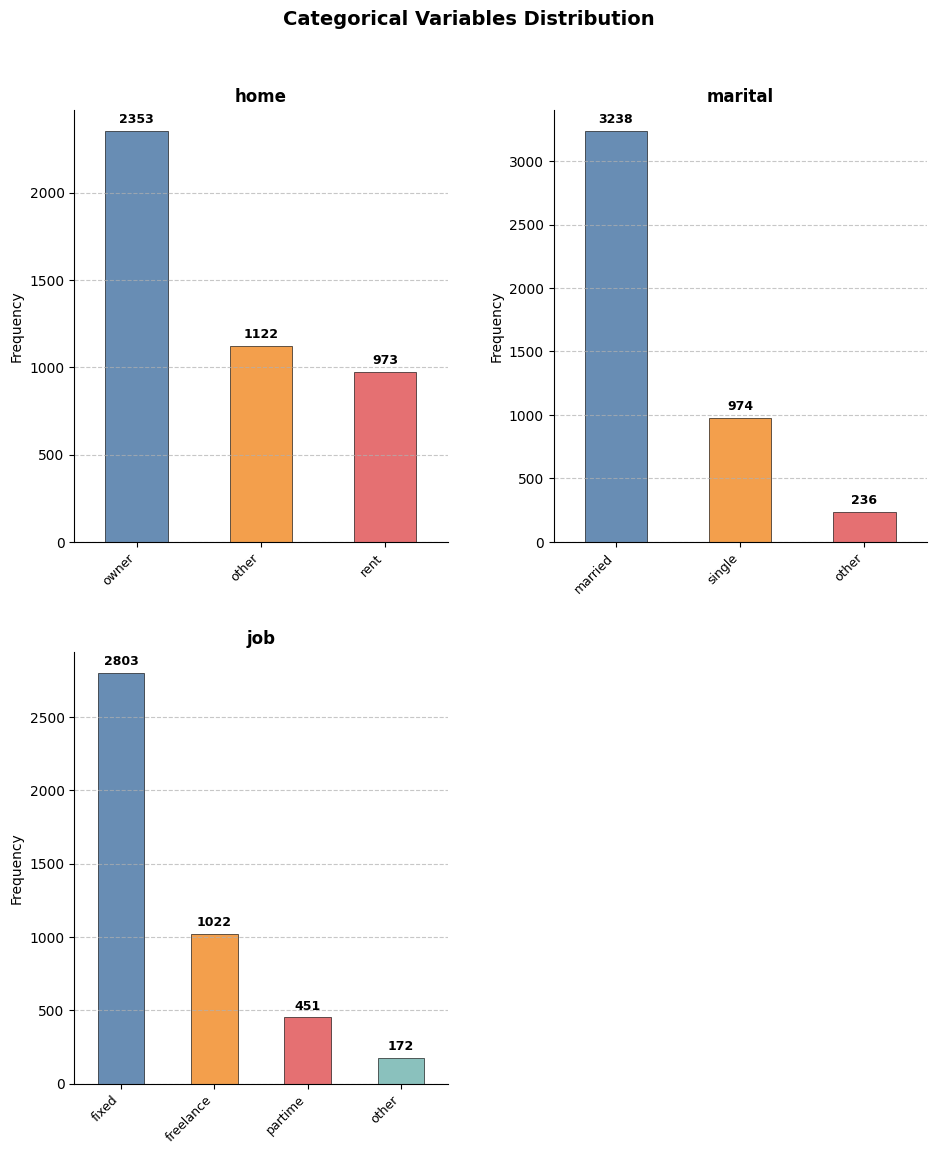

         home  marital    job
count    4448     4448   4448
unique      3        3      4
top     owner  married  fixed
freq     2353     3238   2803


In [56]:
def visualize_categorical_vars(data_pro, rows=2, cols=2, figsize=(10, 12)):
    """
    Analyzes and visualizes categorical variables in a DataFrame using stylized bar charts.
    
    Parameters:
    data_pro (pandas.DataFrame): The DataFrame containing data to analyze
    rows (int): Number of rows in the visualization grid
    cols (int): Number of columns in the visualization grid
    figsize (tuple): Figure size as (width, height)
    
    Returns:
    pd.DataFrame: The describe() output of categorical variables
    """
    # Select categorical variables
    cuali = data_pro.select_dtypes('object')
    
    # Get descriptive statistics
    desc_stats = cuali.describe()
    
    # Get column names
    cualis = cuali.columns
    
    # Create figure and axes
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    # Define a professional color palette
    colors = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f', '#edc949', '#af7aa1', '#ff9da7']
    
    # Create visualizations
    i = 0
    for row in range(rows):
        for col in range(cols):
            if i < len(cualis):  # Verifies that i does not exceed the number of columns
                column = cualis[i]
                # Create a bar chart with custom colors
                value_counts = cuali[column].value_counts()
                bars = value_counts.plot.bar(
                    ax=ax[row, col], 
                    color=colors[:len(value_counts)],  # Use colors from our palette
                    edgecolor='black',  # Add black edge to each bar for definition
                    linewidth=0.5,
                    alpha=0.85  # Slight transparency for a modern look
                )
                
                # Enhance chart appearance
                ax[row, col].set_title(column, fontweight='bold', fontsize=12)
                ax[row, col].set_ylabel("Frequency", fontsize=10)
                ax[row, col].set_xlabel("")
                ax[row, col].spines['top'].set_visible(False)  # Remove top border
                ax[row, col].spines['right'].set_visible(False)  # Remove right border
                
                # Add value labels on top of each bar
                for j, v in enumerate(value_counts):
                    ax[row, col].text(j, v + (max(value_counts)*0.02), str(v), 
                                     ha='center', fontweight='bold', fontsize=9)
                
                # Rotate x-axis labels for better readability
                plt.setp(ax[row, col].get_xticklabels(), rotation=45, ha='right', fontsize=9)
                
                # Add grid lines for easier reading of values
                ax[row, col].yaxis.grid(True, linestyle='--', alpha=0.7)
                
                i += 1
            else:
                ax[row, col].axis("off")
    
    fig.suptitle('Categorical Variables Distribution', fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout(pad=3.0)
    plt.show()
    
    # Return descriptive statistics for further analysis
    return desc_stats

# Call the function
agrup_val_categoricas(data_pro2)
categorical_stats = visualize_categorical_vars(data_pro2)

# If you want to view the descriptive statistics
print(categorical_stats)

In [57]:
data_pro2.describe().round(2)

,seniority,time,age,records,expenses,income,assets,debt,amount,price,default_final
count,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00
mean,7.99,46.46,37.08,0.17,55.59,127.73,4571.28,257.07,1038.81,1462.53,0.28
std,8.18,14.65,10.99,0.38,19.52,72.83,5487.00,669.55,474.66,628.42,0.45
min,0.00,6.00,18.00,0.00,35.00,0.00,0.00,0.00,100.00,105.00,0.00
25%,2.00,36.00,28.00,0.00,35.00,80.00,0.00,0.00,700.00,1116.75,0.00
50%,5.00,48.00,36.00,0.00,51.00,120.00,3500.00,0.00,1000.00,1400.00,0.00
75%,12.00,60.00,45.00,0.00,72.00,166.00,6000.00,0.00,1300.00,1690.50,1.00
max,48.00,72.00,68.00,1.00,180.00,298.00,20000.00,2500.00,5000.00,11140.00,1.00


In [58]:
data_pro2['records'] = data_pro2['records'].replace({'yes': 1, 'no': 0})

### 3.3. Tratamiento de Variables Numéricas

#### 3.3.1. Imputando valores anómalos

In [59]:
#convertir valores anómalos a nulos para un mejor tratamiento
data_pro2.replace(99999999,np.nan, inplace=True)

#ver valores nulos
data_pro2.isnull().sum()

seniority        0
home             0
time             0
age              0
marital          0
records          0
job              0
expenses         0
income           0
assets           0
debt             0
amount           0
price            0
default_final    0
dtype: int64

In [60]:
# se guardan los indices en donde existen los registros con valores nulos
index_null = data[data.isnull().any(axis=1)].index

In [61]:
# se observa los registros donde existen valores nulos
data_pro2.iloc[index_null].head(20)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default_final


In [62]:
#convertir valores anómalos a nulos para un mejor tratamiento
data_pro2.describe().round(2)

,seniority,time,age,records,expenses,income,assets,debt,amount,price,default_final
count,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00,4448.00
mean,7.99,46.46,37.08,0.17,55.59,127.73,4571.28,257.07,1038.81,1462.53,0.28
std,8.18,14.65,10.99,0.38,19.52,72.83,5487.00,669.55,474.66,628.42,0.45
min,0.00,6.00,18.00,0.00,35.00,0.00,0.00,0.00,100.00,105.00,0.00
25%,2.00,36.00,28.00,0.00,35.00,80.00,0.00,0.00,700.00,1116.75,0.00
50%,5.00,48.00,36.00,0.00,51.00,120.00,3500.00,0.00,1000.00,1400.00,0.00
75%,12.00,60.00,45.00,0.00,72.00,166.00,6000.00,0.00,1300.00,1690.50,1.00
max,48.00,72.00,68.00,1.00,180.00,298.00,20000.00,2500.00,5000.00,11140.00,1.00


In [84]:
numerocol1 = len(data_pro2.columns)
print(numerocol1)

14


# Featuring Engineering

In [82]:
def crear_features(data_pro2):
    """
    Crea nuevas características a partir del DataFrame existente data_pro2.
    
    Parámetros:
        data_pro2 (pandas.DataFrame): DataFrame preprocesado con datos de crédito
        
    Retorna:
        pandas.DataFrame: DataFrame original con características adicionales
    """
    
    # Crear una copia para no modificar el original
    df_features = data_pro2.copy()
    
    # 1. Ratios financieros
    # Ratio deuda/ingresos (DTI) - Usar valores pequeños en lugar de 0 para evitar división por cero
    eps = 1e-6  # Valor epsilon más pequeño y más preciso que 0.001
    df_features['dti_ratio'] = df_features['debt'] / df_features['income'].replace(0, eps)
    
    # Ratio préstamo/ingresos (LTI)
    df_features['lti_ratio'] = df_features['amount'] / df_features['income'].replace(0, eps)
    
    # Ratio gastos/ingresos
    df_features['expense_income_ratio'] = df_features['expenses'] / df_features['income'].replace(0, eps)
    
    # Patrimonio neto (activos - deudas)
    df_features['net_worth'] = df_features['assets'] - df_features['debt']
    
    # 2. Transformaciones de variables numéricas
    # Logaritmo de ingresos (para normalizar distribuciones sesgadas)
    # Asegurar que los valores sean positivos antes de aplicar logaritmo
    df_features['log_income'] = np.log1p(np.maximum(0, df_features['income']))
    
    # Logaritmo de activos
    df_features['log_assets'] = np.log1p(np.maximum(0, df_features['assets']))
    
    # 3. Features basados en la edad
    # Categorías de edad - Asegurando que la edad sea positiva
    df_features['age'] = np.maximum(0, df_features['age'])  # Corregir posibles edades negativas
    df_features['age_group'] = pd.cut(
        df_features['age'], 
        bins=[0, 25, 35, 45, 55, 65, 100], 
        labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+']
    )
    
    # 4. Interacciones
    # Interacción entre antigüedad laboral y edad
    df_features['seniority_age_ratio'] = df_features['seniority'] / df_features['age'].replace(0, eps)
    
    # Asegurar que seniority no es mayor que age (inconsistencia lógica)
    df_features['seniority'] = np.minimum(df_features['seniority'], df_features['age'] - 18)
    df_features['seniority'] = np.maximum(0, df_features['seniority'])  # Asegurar que no sea negativa
    
    # Capacidad de pago (ingresos en relación con la deuda y los gastos)
    df_features['payment_capacity'] = df_features['income'] / (df_features['debt'] + df_features['expenses']).replace(0, eps)
    
    # 5. Variables dummy para categorías
    # Creación manual de variables dummy 
    for col in ['home', 'marital', 'records', 'job']:
        # Obtener dummies y añadir prefijo del nombre de columna
        dummies = pd.get_dummies(df_features[col], prefix=col, drop_first=False)
        # Concatenar con el dataframe principal
        df_features = pd.concat([df_features, dummies], axis=1)
    
    # Dummies para la nueva variable age_group
    age_dummies = pd.get_dummies(df_features['age_group'], prefix='age_group', drop_first=False)
    df_features = pd.concat([df_features, age_dummies], axis=1)
    
    # 6. Características adicionales relacionadas con el crédito
    # Verificar que price sea mayor o igual que amount (corregir posibles inconsistencias)
    mask_price_less_than_amount = df_features['price'] < df_features['amount']
    if mask_price_less_than_amount.any():
        print(f"Advertencia: {mask_price_less_than_amount.sum()} registros tienen price < amount. Ajustando price.")
        df_features.loc[mask_price_less_than_amount, 'price'] = df_features.loc[mask_price_less_than_amount, 'amount'] * 1.1  # Ajuste del 10%
    
    # Ratio precio/monto (relevante para préstamos para compras)
    df_features['price_amount_ratio'] = df_features['price'] / df_features['amount'].replace(0, eps)
    
    # Tiempo de reembolso en relación con la antigüedad laboral
    df_features['time_seniority_ratio'] = df_features['time'] / df_features['seniority'].replace(0, eps)
    
    # 7. Normalización de variables principales
    # Convertir las principales variables numéricas a escala 0-1 para facilitar comparación
    for col in ['income', 'expenses', 'assets', 'debt', 'amount']:
        col_min = df_features[col].min()
        col_max = df_features[col].max()
        # Evitar división por cero con un enfoque más robusto
        if col_max > col_min:
            df_features[f'{col}_norm'] = (df_features[col] - col_min) / (col_max - col_min)
        else:
            df_features[f'{col}_norm'] = 0
    
    # Calcular ratio de cobertura de préstamo (cuántos meses de ingresos se necesitan para pagar el préstamo)
    df_features['loan_coverage_months'] = df_features['amount'] / df_features['income'].replace(0, eps)
    
    # Calcular ratio de carga financiera (cuánto del ingreso se destina a pagar deudas)
    df_features['financial_burden'] = df_features['debt'] / df_features['income'].replace(0, eps)
    
    # 8. Eliminar variables originales redundantes
    # Ahora incluye age_group pues ya generamos dummies de esta variable
    columns_to_drop = ['home', 'marital', 'records', 'job', 'age', 'age_group']
    df_features = df_features.drop(columns=columns_to_drop)
        
    return df_features

# Uso de la función
data_pro3 = crear_features_completo(data_pro2)

In [86]:
data_pro3.columns

Index(['seniority', 'time', 'expenses', 'income', 'assets', 'debt', 'amount',
       'price', 'default_final', 'dti_ratio', 'lti_ratio',
       'expense_income_ratio', 'net_worth', 'log_income', 'log_assets',
       'seniority_age_ratio', 'payment_capacity', 'home_other', 'home_owner',
       'home_rent', 'marital_married', 'marital_other', 'marital_single',
       'records_0', 'records_1', 'job_fixed', 'job_freelance', 'job_other',
       'job_partime', 'age_group_<25', 'age_group_25-35', 'age_group_35-45',
       'age_group_45-55', 'age_group_55-65', 'age_group_65+',
       'price_amount_ratio', 'time_seniority_ratio', 'income_norm',
       'expenses_norm', 'assets_norm', 'debt_norm', 'amount_norm',
       'loan_coverage_months', 'financial_burden'],
      dtype='object')

In [83]:
numerocol = len(data_pro3.columns)
print(numerocol)

44


## Balanceado con SMOTE y entrenamiento de modelo

Usando default_final como variable objetivo
Distribución original de clases en entrenamiento: 
default_final
0    2558
1    1000
Name: count, dtype: int64
Distribución después de SMOTE: 
default_final
0    2558
1    2558
Name: count, dtype: int64

Entrenando Regresión Logística...
Regresión Logística - Accuracy: 0.5562, Precision: 0.3744, Recall: 0.8640, F1: 0.5224, ROC AUC: 0.7739
              precision    recall  f1-score   support

           0       0.89      0.44      0.59       640
           1       0.37      0.86      0.52       250

    accuracy                           0.56       890
   macro avg       0.63      0.65      0.55       890
weighted avg       0.75      0.56      0.57       890


Entrenando Random Forest...
Random Forest - Accuracy: 0.6247, Precision: 0.4114, Recall: 0.7800, F1: 0.5387, ROC AUC: 0.7511
              precision    recall  f1-score   support

           0       0.87      0.56      0.68       640
           1       0.41      0.78      0.54       250

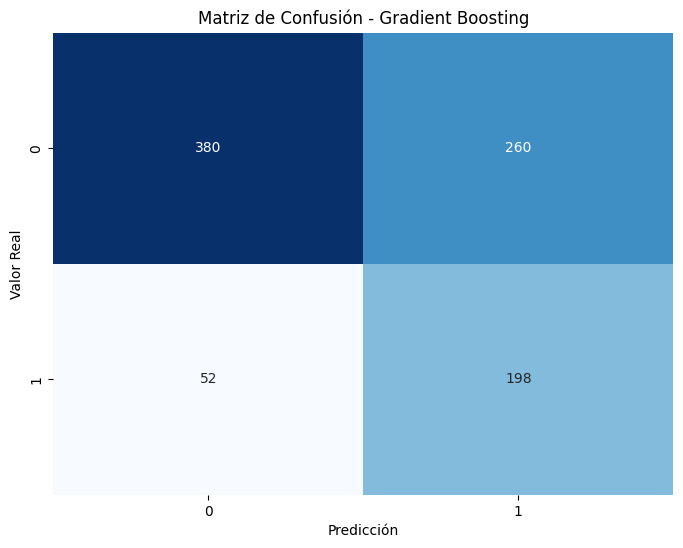

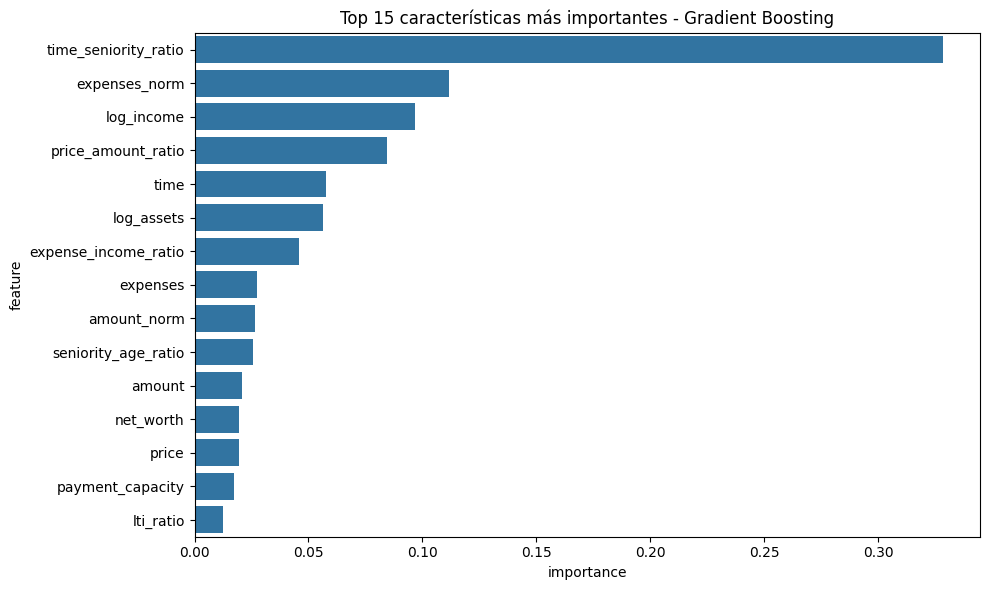


Optimizando hiperparámetros para Gradient Boosting...
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Modelo optimizado - Accuracy: 0.7292, Precision: 0.5152, Recall: 0.6120, F1: 0.5594
              precision    recall  f1-score   support

           0       0.84      0.78      0.80       640
           1       0.52      0.61      0.56       250

    accuracy                           0.73       890
   macro avg       0.68      0.69      0.68       890
weighted avg       0.75      0.73      0.74       890


Comparación antes vs después de optimización:
Precisión original: 0.4323
Precisión optimizada: 0.5152

Modelo final seleccionado: Modelo Optimizado
Métricas del modelo final:
Basado en: Gradient Boosting
Con parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Umbral de clasificación: 0.3
Accuracy: 0.7292
Precision: 0.5152
Recall: 0.6120
F1-score: 0.5594

Modelo Modelo Optimizado guardado como 'modelo_clasificacion_precision.pkl'


In [105]:
# Primero, definimos la clase ThresholdClassifier fuera de la función para que pueda ser serializada
class CustomThresholdClassifier:
    def __init__(self, model, threshold=0.3):
        self.model = model
        self.threshold = threshold
        
    def predict(self, X):
        if hasattr(self.model, "predict_proba"):
            y_prob = self.model.predict_proba(X)[:, 1]
            return (y_prob >= self.threshold).astype(int)
        return self.model.predict(X)
        
    def predict_proba(self, X):
        return self.model.predict_proba(X)
        
    def fit(self, X, y):
        return self.model.fit(X, y)

def balancear_y_entrenar_modelos(data_pro3):
    """
    Realiza el balanceo de clases con SMOTE y entrena varios modelos para seleccionar el mejor.
    
    Parámetros:
        data_pro3 (pandas.DataFrame): DataFrame preprocesado con características adicionales
        
    Retorna:
        dict: Diccionario con los resultados de los modelos y el mejor modelo
    """
    # 1. Separamos features y target
    # Usamos 'default_final' como variable objetivo
    target_column = 'default_final'
    print(f"Usando {target_column} como variable objetivo")
    
    # Separamos X e y
    X = data_pro3.drop(columns=[target_column])
    y = data_pro3[target_column]
    
    # Eliminamos columnas no numéricas para el modelado
    non_numeric_cols = X.select_dtypes(exclude=['number']).columns
    X = X.drop(columns=non_numeric_cols)
    
    # 2. Dividimos los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # 3. Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento
    print(f"Distribución original de clases en entrenamiento: \n{y_train.value_counts()}")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Distribución después de SMOTE: \n{pd.Series(y_train_resampled).value_counts()}")
    
    # 4. Escalamos las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    # 5. Definimos los modelos a entrenar
    models = {
        "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),
        "KNN": KNeighborsClassifier(),
        "Árbol de Decisión": DecisionTreeClassifier(random_state=42)
    }
    
    # 6. Entrenamos los modelos y evaluamos su rendimiento
    results = {}
    for name, model in models.items():
        print(f"\nEntrenando {name}...")
        
        # Entrenamos el modelo con los datos balanceados
        model.fit(X_train_scaled, y_train_resampled)
        
        # Para evaluar con umbral personalizado, obtenemos probabilidades
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
            # Aplicamos umbral personalizado de 0.3
            y_pred = (y_prob >= 0.3).astype(int)
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            y_pred = model.predict(X_test_scaled)
            roc_auc = None
        
        # Calculamos métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Guardamos los resultados
        results[name] = {
            "model": model,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "roc_auc": roc_auc,
            "y_pred": y_pred,
            "y_prob": y_prob if hasattr(model, "predict_proba") else None
        }
        
        if roc_auc is not None:
            print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        else:
            print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: N/A")
        print(classification_report(y_test, y_pred))
    
    # 7. Seleccionamos el mejor modelo basado en Precision (para evitar falsos positivos)
    best_model_name = max(results, key=lambda x: results[x]["precision"])
    best_model = results[best_model_name]
    
    print(f"\nEl mejor modelo es: {best_model_name} con Precisión de {best_model['precision']:.4f}")
    
    # 8. Visualizamos la matriz de confusión del mejor modelo
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, best_model["y_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {best_model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()
    
    # 9. Realizamos un análisis de importancia de características para modelos que lo permiten
    if hasattr(best_model["model"], "feature_importances_"):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_model["model"].feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
        plt.title(f'Top 15 características más importantes - {best_model_name}')
        plt.tight_layout()
        plt.show()
    
    # 10. Mejoramos el mejor modelo con GridSearchCV optimizando para precisión
    if best_model_name == "Regresión Logística":
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    elif best_model_name == "Random Forest":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    elif best_model_name == "Gradient Boosting":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    elif best_model_name == "SVM":
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto', 0.1, 1]
        }
    elif best_model_name == "KNN":
        param_grid = {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    elif best_model_name == "Árbol de Decisión":
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    
    print(f"\nOptimizando hiperparámetros para {best_model_name}...")
    # Cambiamos la métrica de optimización a precisión
    grid_search = GridSearchCV(best_model["model"], param_grid, cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_resampled)
    
    # Evaluamos el modelo optimizado
    best_params = grid_search.best_params_
    optimized_model = grid_search.best_estimator_
    
    # Usamos el umbral personalizado de 0.3 para el modelo optimizado
    if hasattr(optimized_model, "predict_proba"):
        y_prob_optimized = optimized_model.predict_proba(X_test_scaled)[:, 1]
        y_pred_optimized = (y_prob_optimized >= 0.3).astype(int)
    else:
        y_pred_optimized = optimized_model.predict(X_test_scaled)
    
    accuracy_opt = accuracy_score(y_test, y_pred_optimized)
    precision_opt = precision_score(y_test, y_pred_optimized)
    recall_opt = recall_score(y_test, y_pred_optimized)
    f1_opt = f1_score(y_test, y_pred_optimized)
    
    print(f"Mejores parámetros: {best_params}")
    print(f"Modelo optimizado - Accuracy: {accuracy_opt:.4f}, Precision: {precision_opt:.4f}, Recall: {recall_opt:.4f}, F1: {f1_opt:.4f}")
    print(classification_report(y_test, y_pred_optimized))
    
    # Comparamos resultados antes y después de la optimización
    print("\nComparación antes vs después de optimización:")
    print(f"Precisión original: {best_model['precision']:.4f}")
    print(f"Precisión optimizada: {precision_opt:.4f}")
    
    # Encapsulamos el modelo optimizado con el umbral personalizado
    threshold_classifier = CustomThresholdClassifier(optimized_model, threshold=0.3)
    
    # Añadimos el modelo optimizado a los resultados
    results["Modelo Optimizado"] = {
        "model": threshold_classifier,
        "accuracy": accuracy_opt,
        "precision": precision_opt,
        "recall": recall_opt,
        "f1_score": f1_opt,
        "best_params": best_params,
        "original_model": best_model_name,
        "threshold": 0.3
    }
    
    # Seleccionamos el mejor modelo basado en precisión
    final_model_name = "Modelo Optimizado" if precision_opt >= best_model["precision"] else best_model_name
    
    return {
        "all_models": results,
        "best_original_model": best_model_name,
        "best_model": final_model_name,
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train_resampled,
        "y_test": y_test,
        "feature_names": X.columns,
        "scaler": scaler,  # Guardamos el scaler para uso futuro
        "threshold": 0.3   # Guardamos el umbral personalizado
    }

# Ejecutamos la función con data_pro3
resultados = balancear_y_entrenar_modelos(data_pro3)

# Obtenemos el mejor modelo final
mejor_modelo_nombre = resultados["best_model"]
mejor_modelo = resultados["all_models"][mejor_modelo_nombre]["model"]

print(f"\nModelo final seleccionado: {mejor_modelo_nombre}")
print(f"Métricas del modelo final:")
if mejor_modelo_nombre == "Modelo Optimizado":
    print(f"Basado en: {resultados['all_models'][mejor_modelo_nombre]['original_model']}")
    print(f"Con parámetros: {resultados['all_models'][mejor_modelo_nombre]['best_params']}")
    print(f"Umbral de clasificación: {resultados['all_models'][mejor_modelo_nombre]['threshold']}")

print(f"Accuracy: {resultados['all_models'][mejor_modelo_nombre]['accuracy']:.4f}")
print(f"Precision: {resultados['all_models'][mejor_modelo_nombre]['precision']:.4f}")
print(f"Recall: {resultados['all_models'][mejor_modelo_nombre]['recall']:.4f}")
print(f"F1-score: {resultados['all_models'][mejor_modelo_nombre]['f1_score']:.4f}")

# Creamos un diccionario para guardar tanto el modelo como el scaler y la lista de características
modelo_para_guardar = {
    'modelo': mejor_modelo,
    'scaler': resultados['scaler'],
    'feature_names': resultados['feature_names'],
    'threshold': resultados['threshold']  # Guardamos el umbral personalizado
}

# Guardar el modelo en formato .pkl con toda la información necesaria
with open('modelo_clasificacion_precision.pkl', 'wb') as archivo:
    pickle.dump(modelo_para_guardar, archivo)

print(f"\nModelo {mejor_modelo_nombre} guardado como 'modelo_clasificacion_precision.pkl'")
print("Se incluyó el scaler, los nombres de las características y el umbral personalizado para uso futuro.")

# Se determina usar el modelo Gradient Boosting Modelo Optimizado por la precisión.

Probando el modelo con 10 clientes de ejemplo...
Modelo cargado correctamente
Características requeridas por el modelo (25):
seniority, time, expenses, income, assets, debt, amount, price, dti_ratio, lti_ratio, expense_income_ratio, net_worth, log_income, log_assets, seniority_age_ratio, payment_capacity, price_amount_ratio, time_seniority_ratio, income_norm, expenses_norm, assets_norm, debt_norm, amount_norm, loan_coverage_months, financial_burden
Umbral de clasificación: 0.3

Resultados de predicción para nuevos clientes:
   Cliente  Probabilidad_Default  Prediccion  Ingreso  Deuda  \
0        1              0.989516           1     4500  25000   
1        2              0.961331           1     5200  35000   
2        3              0.997795           1     3200  18000   
3        4              0.921681           1     7500  60000   
4        5              0.995654           1     4800  30000   
5        6              0.983734           1     6500  45000   
6        7            

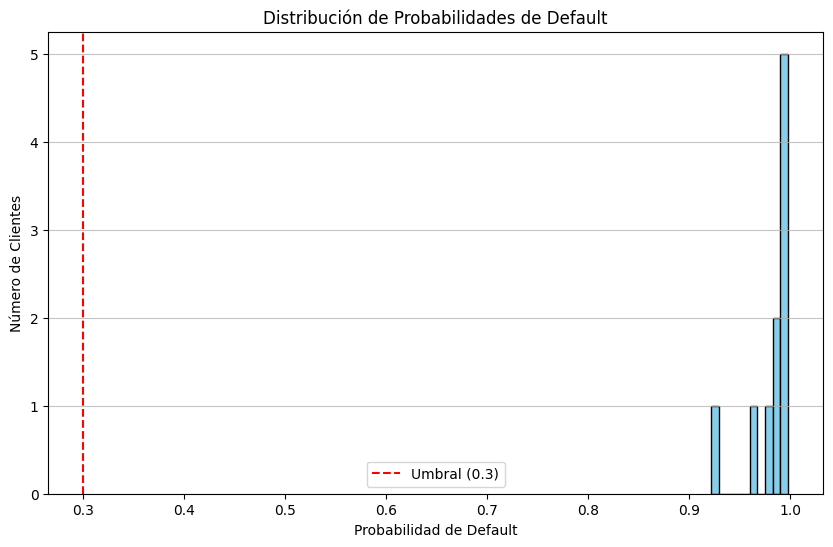

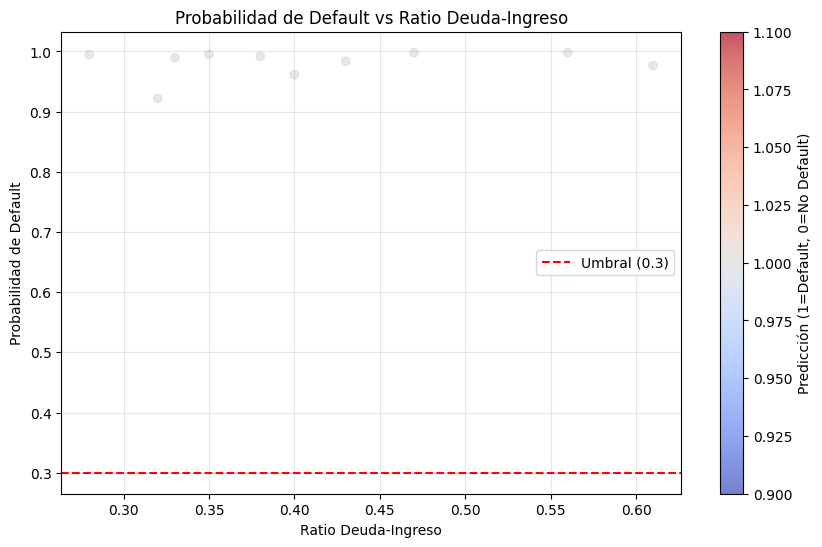


Resultados guardados en 'resultados_predicciones.csv'

Ejemplo de predicción para un solo cliente:

Resultado de la predicción:
Predicción: 1 (1=Default, 0=No Default)
Probabilidad de default: 96.71%
Interpretación: Alto riesgo de default
Nivel de riesgo: Muy Alto


In [110]:
def probar_modelo_con_nuevos_datos():
    """
    Carga el modelo entrenado y lo prueba con nuevos datos de ejemplo.
    """
    # 1. Cargar el modelo guardado
    try:
        with open('modelo_clasificacion_precision.pkl', 'rb') as archivo:
            modelo_guardado = pickle.load(archivo)
            
        print("Modelo cargado correctamente")
        modelo = modelo_guardado['modelo']
        scaler = modelo_guardado['scaler']
        feature_names = modelo_guardado['feature_names']
        threshold = modelo_guardado['threshold']
        
        print(f"Características requeridas por el modelo ({len(feature_names)}):")
        print(", ".join(feature_names))
        print(f"Umbral de clasificación: {threshold}")
        
    except FileNotFoundError:
        print("Error: No se encontró el archivo del modelo. Asegúrate de haber entrenado y guardado el modelo primero.")
        return
    except Exception as e:
        print(f"Error al cargar el modelo: {e}")
        return
    
    # 2. Crear datos de prueba ficticios (10 filas) con SOLO las características requeridas
    # Basándonos en el error, estas son las características que necesitamos:
    datos_nuevos = {
        # Variables financieras básicas
        'seniority': [5, 8, 2, 12, 7, 10, 3, 6, 15, 4],  # Años de antigüedad laboral
        'time': [36, 48, 24, 60, 36, 48, 24, 36, 60, 30],  # Plazo del préstamo en meses
        'expenses': [1500, 1800, 1200, 2500, 1600, 2200, 1300, 1700, 2800, 1400],  # Gastos mensuales
        'income': [4500, 5200, 3200, 7500, 4800, 6500, 3600, 5000, 8200, 4000],  # Ingresos mensuales
        'assets': [80000, 120000, 40000, 250000, 95000, 180000, 50000, 110000, 300000, 75000],  # Activos totales
        'debt': [25000, 35000, 18000, 60000, 30000, 45000, 22000, 32000, 70000, 28000],  # Deuda total
        'amount': [50000, 65000, 30000, 100000, 55000, 80000, 35000, 60000, 120000, 45000],  # Monto del préstamo
        'price': [60000, 75000, 35000, 120000, 65000, 95000, 42000, 70000, 150000, 55000],  # Precio del bien financiado
        
        # Ratios financieros
        'dti_ratio': [0.33, 0.40, 0.56, 0.32, 0.35, 0.43, 0.61, 0.38, 0.28, 0.47],  # Ratio deuda-ingresos
        'lti_ratio': [0.92, 1.04, 0.78, 1.11, 0.96, 1.03, 0.81, 1.00, 1.22, 0.94],  # Ratio préstamo-ingresos
        'expense_income_ratio': [0.33, 0.35, 0.38, 0.33, 0.33, 0.34, 0.36, 0.34, 0.34, 0.35],  # Ratio gastos-ingresos
        'net_worth': [55000, 85000, 22000, 190000, 65000, 135000, 28000, 78000, 230000, 47000],  # Patrimonio neto
        
        # Variables transformadas
        'log_income': [8.41, 8.56, 8.07, 8.92, 8.48, 8.78, 8.19, 8.52, 9.01, 8.29],  # Logaritmo de ingresos
        'log_assets': [11.29, 11.70, 10.60, 12.43, 11.46, 12.10, 10.82, 11.61, 12.61, 11.23],  # Logaritmo de activos
        'seniority_age_ratio': [0.14, 0.19, 0.07, 0.21, 0.18, 0.22, 0.10, 0.16, 0.29, 0.10],  # Ratio antigüedad/edad
        'payment_capacity': [3000, 3400, 2000, 5000, 3200, 4300, 2300, 3300, 5400, 2600],  # Capacidad de pago
        'price_amount_ratio': [1.20, 1.15, 1.17, 1.20, 1.18, 1.19, 1.20, 1.17, 1.25, 1.22],  # Ratio precio/monto
        'time_seniority_ratio': [7.2, 6.0, 12.0, 5.0, 5.1, 4.8, 8.0, 6.0, 4.0, 7.5],  # Ratio plazo/antigüedad
        
        # Variables normalizadas
        'income_norm': [0.55, 0.63, 0.39, 0.91, 0.58, 0.79, 0.44, 0.61, 1.0, 0.49],  # Ingresos normalizados
        'expenses_norm': [0.54, 0.64, 0.43, 0.89, 0.57, 0.79, 0.46, 0.61, 1.0, 0.50],  # Gastos normalizados
        'assets_norm': [0.27, 0.40, 0.13, 0.83, 0.32, 0.60, 0.17, 0.37, 1.0, 0.25],  # Activos normalizados
        'debt_norm': [0.36, 0.50, 0.26, 0.86, 0.43, 0.64, 0.31, 0.46, 1.0, 0.40],  # Deuda normalizada
        'amount_norm': [0.42, 0.54, 0.25, 0.83, 0.46, 0.67, 0.29, 0.50, 1.0, 0.38],  # Monto préstamo normalizado
        
        # Otras variables derivadas
        'loan_coverage_months': [16, 24, 12, 30, 20, 25, 15, 22, 35, 18],  # Meses de cobertura del préstamo
        'financial_burden': [0.22, 0.25, 0.28, 0.20, 0.23, 0.24, 0.29, 0.24, 0.19, 0.26]  # Carga financiera
    }
    
    # Convertir a DataFrame
    df_nuevos = pd.DataFrame(datos_nuevos)
    
    # Verificar si tenemos todas las características necesarias para el modelo
    missing_features = [feature for feature in feature_names if feature not in df_nuevos.columns]
    if missing_features:
        print(f"Faltan las siguientes características en los datos nuevos: {missing_features}")
        # Para este ejemplo, agregamos características faltantes con valores aleatorios
        for feature in missing_features:
            df_nuevos[feature] = np.random.uniform(0, 1, size=len(df_nuevos))
        print("Se agregaron características faltantes con valores aleatorios para este ejemplo")
    
    # Asegurarnos de tener solo las características que necesita el modelo y en el mismo orden
    df_nuevos = df_nuevos[feature_names]
    
    # 3. Preprocesar los datos nuevos usando el mismo scaler que se usó durante el entrenamiento
    X_nuevos_scaled = scaler.transform(df_nuevos)
    
    # 4. Realizar predicciones
    try:
        # Algunos modelos retornan probabilidades, otros directamente las clases
        if hasattr(modelo, 'predict_proba'):
            # Obtener probabilidades
            probs_nuevos = modelo.predict_proba(X_nuevos_scaled)[:, 1]
            # Aplicar umbral personalizado
            predicciones_nuevos = (probs_nuevos >= threshold).astype(int)
            # Mostrar también las probabilidades
            tiene_probs = True
        else:
            # El modelo ya aplica el umbral internamente o no ofrece probabilidades
            predicciones_nuevos = modelo.predict(X_nuevos_scaled)
            probs_nuevos = None
            tiene_probs = False
            
        # 5. Mostrar resultados
        resultados = pd.DataFrame({
            'Cliente': range(1, len(df_nuevos) + 1),
            'Probabilidad_Default': probs_nuevos if tiene_probs else None,
            'Prediccion': predicciones_nuevos
        })
        
        # Añadir algunas características importantes para referencia
        if 'income' in df_nuevos.columns:
            resultados['Ingreso'] = df_nuevos['income']
        if 'debt' in df_nuevos.columns:
            resultados['Deuda'] = df_nuevos['debt']
        if 'dti_ratio' in df_nuevos.columns:
            resultados['Ratio_Deuda_Ingreso'] = df_nuevos['dti_ratio']
        if 'amount' in df_nuevos.columns:
            resultados['Monto_Prestamo'] = df_nuevos['amount']
        
        print("\nResultados de predicción para nuevos clientes:")
        pd.set_option('display.max_columns', None)
        print(resultados)
        
        # Mostrar estadísticas de las predicciones
        print(f"\nResumen de predicciones:")
        print(f"Total de clientes: {len(predicciones_nuevos)}")
        print(f"Clientes clasificados como default (1): {sum(predicciones_nuevos)} ({sum(predicciones_nuevos)/len(predicciones_nuevos)*100:.1f}%)")
        print(f"Clientes clasificados como no-default (0): {len(predicciones_nuevos) - sum(predicciones_nuevos)} ({(len(predicciones_nuevos) - sum(predicciones_nuevos))/len(predicciones_nuevos)*100:.1f}%)")
        
        # 6. Visualizaciones
        if tiene_probs:
            # Histograma de probabilidades
            plt.figure(figsize=(10, 6))
            plt.hist(probs_nuevos, bins=10, color='skyblue', edgecolor='black')
            plt.axvline(x=threshold, color='red', linestyle='--', 
                        label=f'Umbral ({threshold})')
            plt.title('Distribución de Probabilidades de Default')
            plt.xlabel('Probabilidad de Default')
            plt.ylabel('Número de Clientes')
            plt.legend()
            plt.grid(axis='y', alpha=0.75)
            plt.show()
            
            # Scatter plot de probabilidad vs ratio deuda-ingreso
            if 'dti_ratio' in df_nuevos.columns:
                plt.figure(figsize=(10, 6))
                plt.scatter(df_nuevos['dti_ratio'], probs_nuevos, 
                           c=predicciones_nuevos, cmap='coolwarm', alpha=0.7)
                plt.axhline(y=threshold, color='red', linestyle='--', 
                           label=f'Umbral ({threshold})')
                plt.title('Probabilidad de Default vs Ratio Deuda-Ingreso')
                plt.xlabel('Ratio Deuda-Ingreso')
                plt.ylabel('Probabilidad de Default')
                plt.colorbar(label='Predicción (1=Default, 0=No Default)')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.show()
        
        # 7. Guardar los resultados en un archivo CSV
        resultados.to_csv('resultados_predicciones.csv', index=False)
        print("\nResultados guardados en 'resultados_predicciones.csv'")
        
        return resultados
        
    except Exception as e:
        print(f"Error al realizar predicciones: {e}")
        import traceback
        traceback.print_exc()
        return None

def predecir_default(datos_cliente, modelo_path='modelo_clasificacion_precision.pkl'):
    """
    Función para predecir el riesgo de default para un nuevo cliente.
    
    Parámetros:
        datos_cliente (dict): Diccionario con los datos del cliente
        modelo_path (str): Ruta al archivo del modelo guardado
        
    Retorna:
        dict: Diccionario con la predicción y probabilidad
    """
    try:
        # Cargar modelo
        with open(modelo_path, 'rb') as archivo:
            modelo_guardado = pickle.load(archivo)
        
        modelo = modelo_guardado['modelo']
        scaler = modelo_guardado['scaler']
        feature_names = modelo_guardado['feature_names']
        threshold = modelo_guardado['threshold']
        
        # Convertir a DataFrame
        df_cliente = pd.DataFrame([datos_cliente])
        
        # Verificar características faltantes
        missing_features = [feature for feature in feature_names if feature not in df_cliente.columns]
        if missing_features:
            missing_str = ", ".join(missing_features)
            raise ValueError(f"Faltan las siguientes características: {missing_str}")
        
        # Seleccionar solo las características que necesita el modelo y en el mismo orden
        df_cliente = df_cliente[feature_names]
        
        # Escalar los datos
        X_cliente_scaled = scaler.transform(df_cliente)
        
        # Predecir
        if hasattr(modelo, 'predict_proba'):
            probabilidad = modelo.predict_proba(X_cliente_scaled)[0, 1]
            prediccion = 1 if probabilidad >= threshold else 0
        else:
            prediccion = modelo.predict(X_cliente_scaled)[0]
            probabilidad = None
        
        # Resultado
        resultado = {
            'prediccion': int(prediccion),
            'probabilidad': float(probabilidad) if probabilidad is not None else None,
            'umbral': threshold,
            'interpretacion': 'Alto riesgo de default' if prediccion == 1 else 'Bajo riesgo de default'
        }
        
        # Nivel de riesgo más detallado si tenemos probabilidad
        if probabilidad is not None:
            if probabilidad < 0.2:
                resultado['nivel_riesgo'] = 'Muy Bajo'
            elif probabilidad < 0.4:
                resultado['nivel_riesgo'] = 'Bajo'
            elif probabilidad < 0.6:
                resultado['nivel_riesgo'] = 'Moderado'
            elif probabilidad < 0.8:
                resultado['nivel_riesgo'] = 'Alto'
            else:
                resultado['nivel_riesgo'] = 'Muy Alto'
        
        return resultado
        
    except Exception as e:
        print(f"Error al predecir: {e}")
        import traceback
        traceback.print_exc()
        return {'error': str(e)}

# Ejemplo de uso
if __name__ == "__main__":
    print("Probando el modelo con 10 clientes de ejemplo...")
    resultados = probar_modelo_con_nuevos_datos()
    
    print("\nEjemplo de predicción para un solo cliente:")
    cliente_ejemplo = {
        'seniority': 7,
        'time': 48,
        'expenses': 1800,
        'income': 5500,
        'assets': 120000,
        'debt': 35000,
        'amount': 60000,
        'price': 72000,
        'dti_ratio': 0.36,
        'lti_ratio': 0.91,
        'expense_income_ratio': 0.33,
        'net_worth': 85000,
        'log_income': 8.61,
        'log_assets': 11.7,
        'seniority_age_ratio': 0.18,
        'payment_capacity': 3700,
        'price_amount_ratio': 1.2,
        'time_seniority_ratio': 6.9,
        'income_norm': 0.67,
        'expenses_norm': 0.64,
        'assets_norm': 0.4,
        'debt_norm': 0.5,
        'amount_norm': 0.5,
        'loan_coverage_months': 24,
        'financial_burden': 0.22
    }
    
    # Verificar si hay características faltantes
    try:
        with open('modelo_clasificacion_precision.pkl', 'rb') as archivo:
            modelo_guardado = pickle.load(archivo)
        feature_names = modelo_guardado['feature_names']
        
        # Verificar si faltan características
        missing_features = [feature for feature in feature_names if feature not in cliente_ejemplo]
        if missing_features:
            print(f"Faltan las siguientes características en el cliente ejemplo: {missing_features}")
            # Para este ejemplo, agregamos características faltantes
            for feature in missing_features:
                cliente_ejemplo[feature] = 0.5  # Valor por defecto
            print("Se agregaron características faltantes con valores por defecto (0.5)")
    except:
        print("No se pudo cargar el modelo para verificar características faltantes")
    
    resultado = predecir_default(cliente_ejemplo)
    print("\nResultado de la predicción:")
    if 'error' in resultado:
        print(f"Error: {resultado['error']}")
    else:
        print(f"Predicción: {resultado['prediccion']} (1=Default, 0=No Default)")
        print(f"Probabilidad de default: {resultado['probabilidad']:.2%}" if resultado.get('probabilidad') is not None else "Probabilidad no disponible")
        print(f"Interpretación: {resultado['interpretacion']}")
        if 'nivel_riesgo' in resultado:
            print(f"Nivel de riesgo: {resultado['nivel_riesgo']}")